# Dataset Preparation

### Description

The dataset that that will be used is the <b> Stars Dataset </b>. 

In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental topics in astronomy. The early cataloging of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built

The data consists of <b> 100,000 observations </b> of space taken by the SDSS (Sloan Digital Sky Survey). 

Every observation is described by <b>18 feature columns</b>.

• **obj_ID** – Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

• **alpha** – Right Ascension angle (at J2000 epoch)

• **delta** – Declination angle (at J2000 epoch)

• **u** – Ultraviolet filter in the photometric system

• **g** – Green filter in the photometric system

• **r** – Red filter in the photometric system

• **i** – Near Infrared filter in the photometric system

• **z** – Infrared filter in the photometric system

• **run_ID** – Run Number used to identify the specific scan

• **rereun_ID** – Rerun Number to specify how the image was processed

• **cam_col** – Camera column to identify the scanline within the run

• **field_ID** – Field number to identify each field

• **spec_obj_ID** – Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)

• **class** – Object class (galaxy, star, or quasar object)

• **redshift** – Redshift value based on the increase in wavelength

• **plate** – Plate ID, identifies each plate in SDSS

• **MJD** – Modified Julian Date, used to indicate when a given piece of SDSS data was taken

• **fiber_ID** – Identifies the fiber that pointed the light at the focal plane in each observation


### Importing of Libraries

In [72]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import os
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats


### Importing the Stars Dataset

In [73]:
stars = pd.read_csv('data/original/stars.csv')
stars.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [74]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

### Data preprocessing and Cleaning

Show all columns in the dataset

In [75]:
stars.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

Get all the unique value counts

In [76]:
# Get the number of unique values for each column
unique_counts = stars.nunique()
unique_counts

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64

Find null values

In [77]:
null_counts = stars.isnull().sum()

# Display the number of null values for all columns
print(null_counts)

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


We need to find the right ID to use when indexing. 

In [78]:
print(stars[['obj_ID']].value_counts().shape)
print(stars[['spec_obj_ID']].value_counts().shape)

(78053,)
(100000,)


Since, spec_obj_ID is more specific we will use that for indexing.

In [79]:
stars.drop('spec_obj_ID', axis=1, inplace=True)
stars.insert(0, 'spec_obj_ID', np.arange(len(stars)))
stars.head()

,spec_obj_ID,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID
0,0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,GALAXY,0.634794,5812,56354,171
1,1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,GALAXY,0.779136,10445,58158,427
2,2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,GALAXY,0.644195,4576,55592,299
3,3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,GALAXY,0.932346,9149,58039,775
4,4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,GALAXY,0.116123,6121,56187,842


In [80]:
stars['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

### Getting X and y data

Since some columns are just IDs and do not provide any insight for the model, we will remove those.

In [81]:
cleaned = stars[['spec_obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'class']]
cleaned.head()

,spec_obj_ID,alpha,delta,u,g,r,i,z,redshift,class
0,0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY


We then get look for the outliers

In [82]:
columnsx1 = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

z_scores = stats.zscore(cleaned[columnsx1])

mask_outliers = (np.abs(z_scores) >= 3).any(axis=1)

outliers = cleaned[mask_outliers]

print("Outliers shape:", outliers.shape)


Outliers shape: (2116, 10)


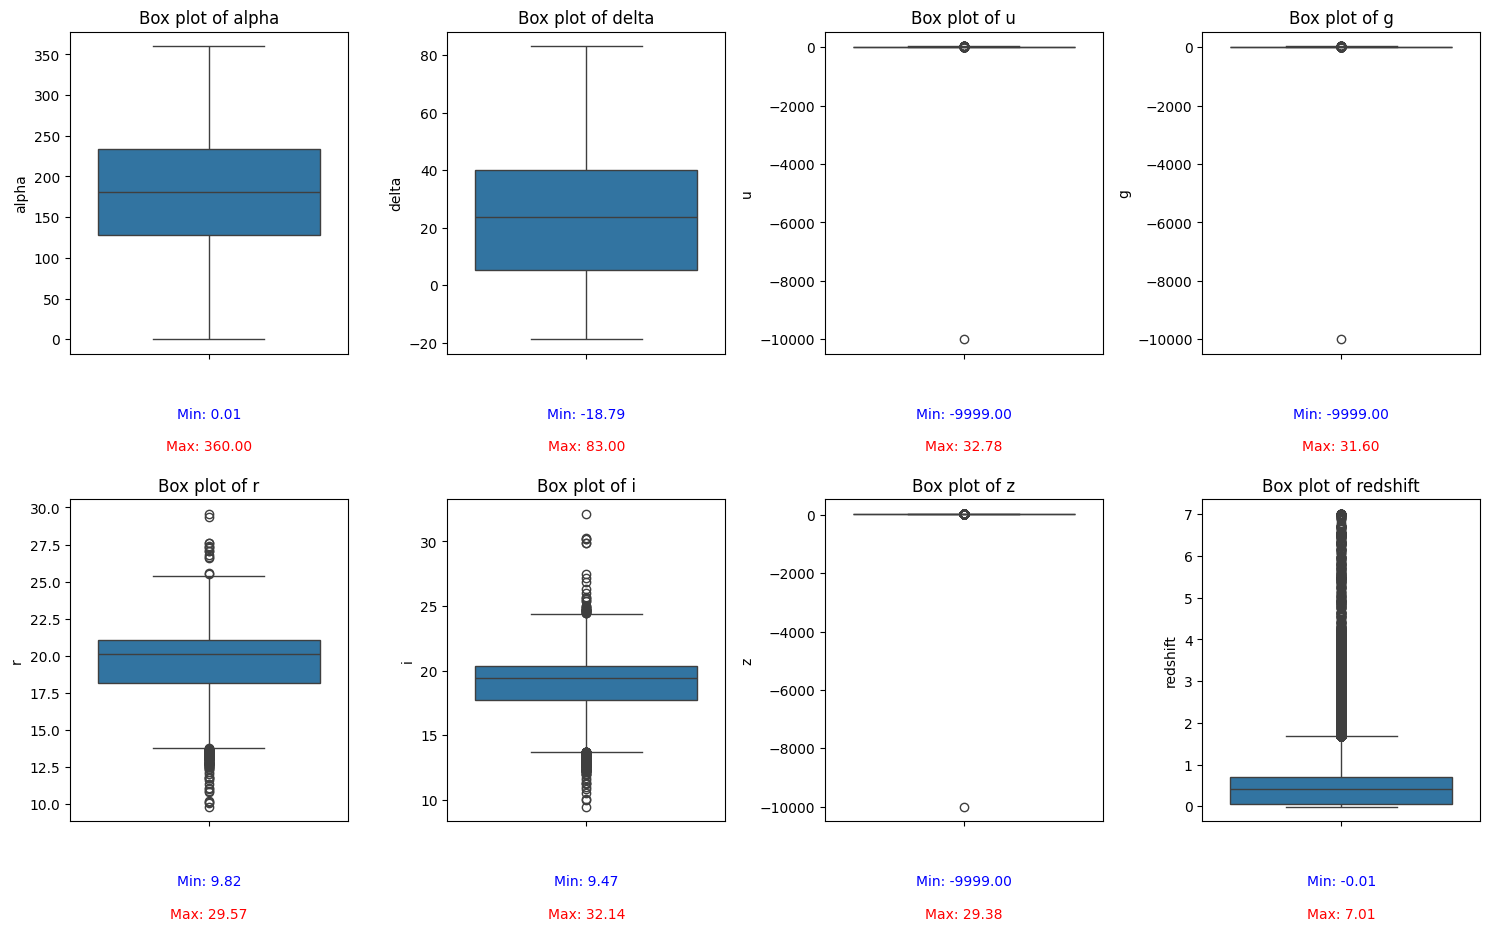

In [83]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columnsx1, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=cleaned, y=column)
    
    # Get the minimum and maximum values
    min_value = cleaned[column].min()
    max_value = cleaned[column].max()
    
    # Add text annotations for min and max values
    plt.text(0.5, -0.2, f'Min: {min_value:.2f}', horizontalalignment='center', fontsize=10, color='blue', transform=plt.gca().transAxes)
    plt.text(0.5, -0.3, f'Max: {max_value:.2f}', horizontalalignment='center', fontsize=10, color='red', transform=plt.gca().transAxes)
    
    # Title for each subplot
    plt.title(f'Box plot of {column}')
    
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for titles and annotations
plt.show()

Removed the outlier with the MinValue of -9999.00

In [84]:
errorvalue = -9999.00
cleaned= cleaned[cleaned['u'] != errorvalue]
cleaned = cleaned[cleaned['g'] != errorvalue]
cleaned = cleaned[cleaned['z'] != errorvalue]


In [85]:
cleaned.shape

(99999, 10)

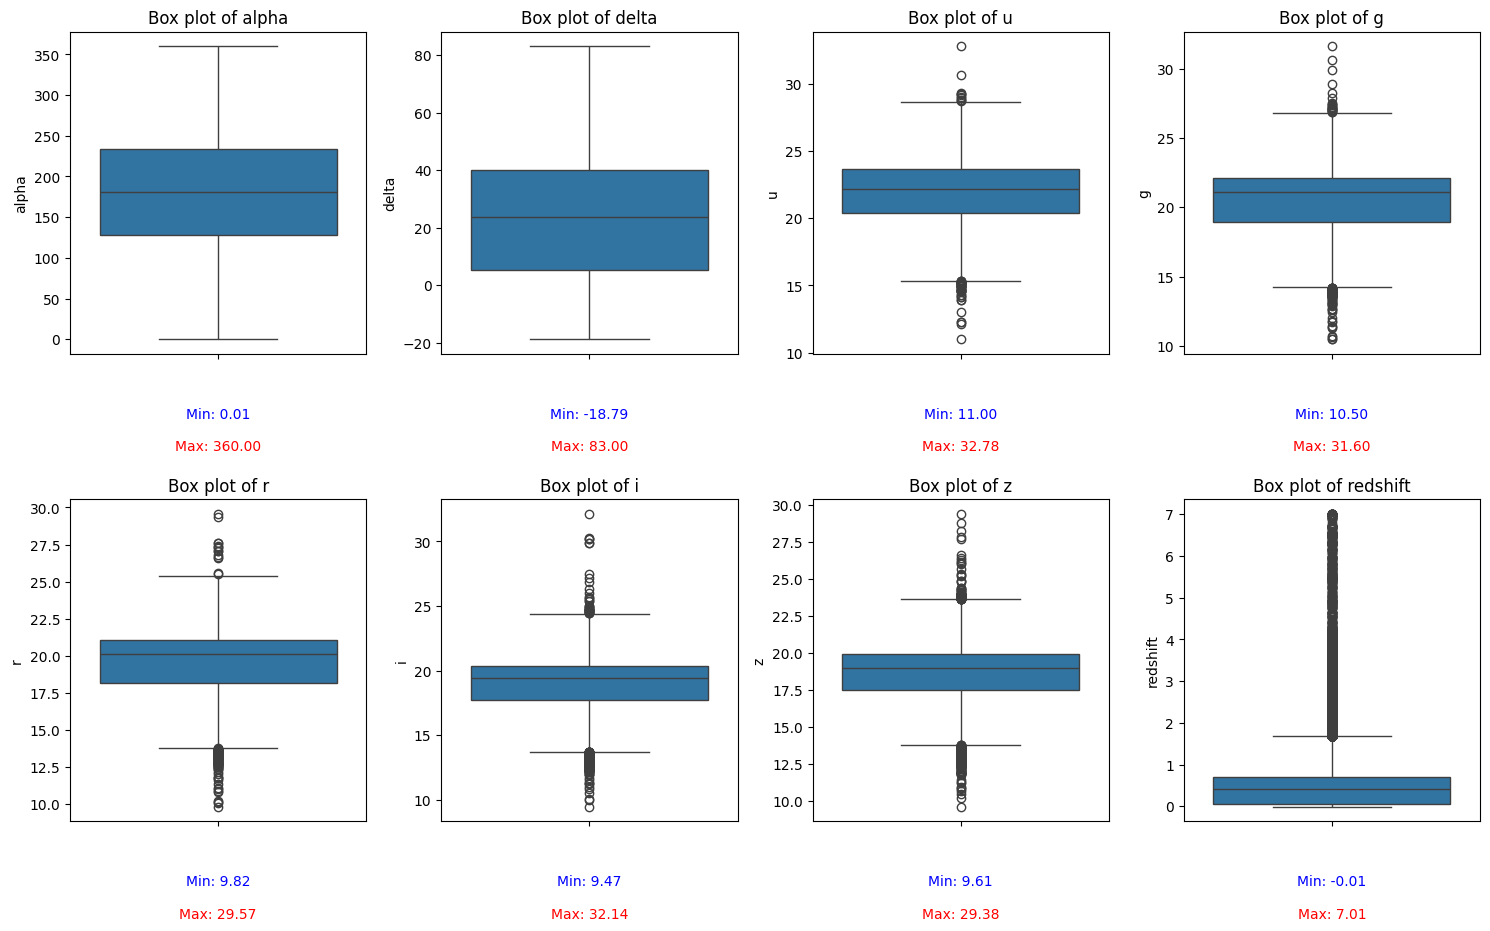

In [86]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columnsx1, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=cleaned, y=column)
    
    # Get the minimum and maximum values
    min_value = cleaned[column].min()
    max_value = cleaned[column].max()
    
    # Add text annotations for min and max values
    plt.text(0.5, -0.2, f'Min: {min_value:.2f}', horizontalalignment='center', fontsize=10, color='blue', transform=plt.gca().transAxes)
    plt.text(0.5, -0.3, f'Max: {max_value:.2f}', horizontalalignment='center', fontsize=10, color='red', transform=plt.gca().transAxes)
    
    # Title for each subplot
    plt.title(f'Box plot of {column}')
    
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for titles and annotations
plt.show()

In [87]:
# Reset the index to create a new range of indices and drop the current index
cleaned.reset_index(drop=True, inplace=True)

# Assign new sequential 'spec_obj_ID' based on the new index
cleaned['spec_obj_ID'] = cleaned.index

# Move 'spec_obj_ID' to the first column
cols = ['spec_obj_ID'] + [col for col in cleaned.columns if col != 'spec_obj_ID']
cleaned = cleaned[cols]

cleaned


,spec_obj_ID,alpha,delta,u,g,r,i,z,redshift,class
0,0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY
...,...,...,...,...,...,...,...,...,...,...
99994,99994,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY
99995,99995,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY
99996,99996,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY
99997,99997,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY


For Normalization aspects, we will compare some of the trasnformation techniques on the the data to determine the most appropaite one to adress the outliers in the redshift

In [88]:
from sklearn.preprocessing import PowerTransformer

def sqrt_transform_feature(df, feature):
    feature_min = df[feature].min()
    shifter = abs(feature_min) + 0.001
    df[feature] = np.sqrt(df[feature] + shifter)
    return df

def log_transform_feature(df, feature):
    feature_min = df[feature].min()
    shifter = abs(feature_min) + 0.001
    df[feature] = np.log(df[feature] + shifter)
    return df

def yeo_johnson_transform_feature(df, feature):
    transformer = PowerTransformer(method='yeo-johnson')
    df[feature] = transformer.fit_transform(df[[feature]])
    return df


In [89]:
from scipy.stats import skew, kurtosis

def compute_statistics(df, feature):
    stats_dict = {}
    transformations = {
        'Original': df[feature],
        'Square Root': sqrt_transform_feature(df.copy(), feature)[feature],
        'Log': log_transform_feature(df.copy(), feature)[feature],
        'Yeo-Johnson': yeo_johnson_transform_feature(df.copy(), feature)[feature]
    }
    
    for name, data in transformations.items():
        stats_dict[name] = {
            'Skewness': skew(data),
            'Kurtosis': kurtosis(data)
        }
    
    stats_df = pd.DataFrame(stats_dict).T
    return stats_df

feature = 'redshift' 
stats_df = compute_statistics(cleaned, feature)
print(stats_df)

             Skewness  Kurtosis
Original     2.523561  9.972305
Square Root  0.714353  0.371714
Log         -0.600628 -0.959610
Yeo-Johnson  0.183287 -1.092820


From this output we used Log

In [90]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np

seed_num = 42
np.random.seed(seed_num)

# Define the columns to be used for normalization
cols = ['u', 'g', 'r', 'i', 'z', 'redshift']

# Function to log-transform a feature
def log_transform_feature(df, feature):
    feature_min = df[feature].min()
    shifter = abs(feature_min) + 0.001
    df[feature] = np.log(df[feature] + shifter)
    return df

cleaned_transformed = cleaned.copy()

# Log-transform the 'redshift' feature
cleaned_transformed = log_transform_feature(cleaned_transformed, "redshift")

# Normalize the dataset
scaler = RobustScaler()
cleaned_transformed[cols] = scaler.fit_transform(cleaned_transformed[cols])
cleaned[cols] = cleaned_transformed[cols]

# Split the normalized data into features and target
X = cleaned[cols]
y = cleaned["class"]

# Verify the value counts of the 'class' column
print(cleaned['class'].value_counts())

class
GALAXY    59445
STAR      21593
QSO       18961
Name: count, dtype: int64


In [91]:
cleaned['class'].value_counts()

class
GALAXY    59445
STAR      21593
QSO       18961
Name: count, dtype: int64

From this output it is clear there is a imbalance in the class. So we utilized Undersampler 

In [92]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Apply undersampling to the entire dataset
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

class_mapping = {'GALAXY': 0, 'QSO': 1, 'STAR': 2}
y_resampled_encoded = y_resampled.replace(class_mapping)

# Split the undersampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_encoded, random_state=seed_num, test_size=0.3, stratify=y_resampled_encoded)

X_train_df = pd.DataFrame(X_train, columns=cols)
X_test_df = pd.DataFrame(X_test, columns=cols)
y_train_df = pd.DataFrame(y_train, columns=['class'])
y_test_df = pd.DataFrame(y_test, columns=['class'])

# Save the data to CSV files
X_train_df.to_csv('data/cleaned/X_train.csv', index=False)
X_test_df.to_csv('data/cleaned/X_test.csv', index=False)
y_train_df.to_csv('data/cleaned/y_train.csv', index=False)
y_test_df.to_csv('data/cleaned/y_test.csv', index=False)

cleaned_resampled = pd.DataFrame(X_resampled, columns=cols)
cleaned_resampled['class'] = y_resampled_encoded
print(cleaned_resampled['class'].value_counts())

class
0    18961
1    18961
2    18961
Name: count, dtype: int64


In [93]:
# Define output directory and file path
output_dir = 'data/cleaned'
os.makedirs(output_dir, exist_ok=True)

# Export combined dataset to CSV
cleaned_resampled.to_csv('data/cleaned/cleaned_resampled.csv', index=False)




In [94]:

#X = cleaned.drop('class', axis=1)
#y = cleaned['class']
# Initialize the RandomUnderSampler
#rus = RandomUnderSampler(random_state=42)

# Apply undersampling
#X_rus, y_rus = rus.fit_resample(X, y)


#undersampled_df = pd.concat([pd.DataFrame(X_rus, columns=X.columns), pd.DataFrame(y_rus, columns=['class'])], axis=1)

#print(undersampled_df['class'].value_counts())

In [95]:

#class_mapping = {'GALAXY': 0, 'QSO': 1, 'STAR': 2}
# Apply the mapping to both datasets
#cleaned['class'] = cleaned['class'].replace(class_mapping)
#undersampled_df['class'] = undersampled_df['class'].replace(class_mapping)


In [96]:
#cleaned = pd.concat([cleaned, undersampled_df], ignore_index=True)


# Exploratory Data Analysis

In [97]:
print("Shape of the dataset:", cleaned_resampled.shape)
cleaned_resampled.head()


Shape of the dataset: (56883, 7)


,u,g,r,i,z,redshift,class
44131,-0.569355,-0.930289,-1.073639,-1.084771,-1.167265,-0.422735,0
34126,0.230790,0.546744,0.718138,0.687197,0.925952,0.278952,0
9667,-0.383170,-0.721372,-0.861799,-0.845595,-0.888269,-0.354651,0
52810,0.806082,0.204307,-0.022073,-0.099030,-0.114621,0.043312,0
98129,0.179639,0.443297,0.137752,0.029712,0.045925,0.076027,0


In [98]:
cleaned_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56883 entries, 44131 to 25374
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   u         56883 non-null  float64
 1   g         56883 non-null  float64
 2   r         56883 non-null  float64
 3   i         56883 non-null  float64
 4   z         56883 non-null  float64
 5   redshift  56883 non-null  float64
 6   class     56883 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 3.5 MB


In [99]:
print("Shape of the dataset:", cleaned_resampled.shape)




Shape of the dataset: (56883, 7)


In [100]:
print("Descriptive Statistics:")
display(cleaned_resampled.describe())


Descriptive Statistics:


,u,g,r,i,z,redshift,class
count,56883.000000,56883.000000,56883.000000,56883.000000,56883.000000,56883.000000,56883.000000
mean,-0.128886,-0.199160,-0.142730,-0.052025,0.001939,-0.386329,1.000000
std,0.647414,0.617656,0.629265,0.667514,0.732360,0.898331,0.816504
min,-3.353126,-3.356534,-3.541856,-3.729125,-3.817545,-2.541543,0.000000
25%,-0.593802,-0.650759,-0.591722,-0.511007,-0.497960,-1.536954,0.000000
50%,-0.131973,-0.077830,0.016263,0.069194,0.096875,-0.012531,1.000000
75%,0.309993,0.240016,0.333161,0.465249,0.553983,0.401063,2.000000
max,3.179019,3.009962,3.247359,4.780488,4.218665,1.163395,2.000000


Data Distribution and Visualizations


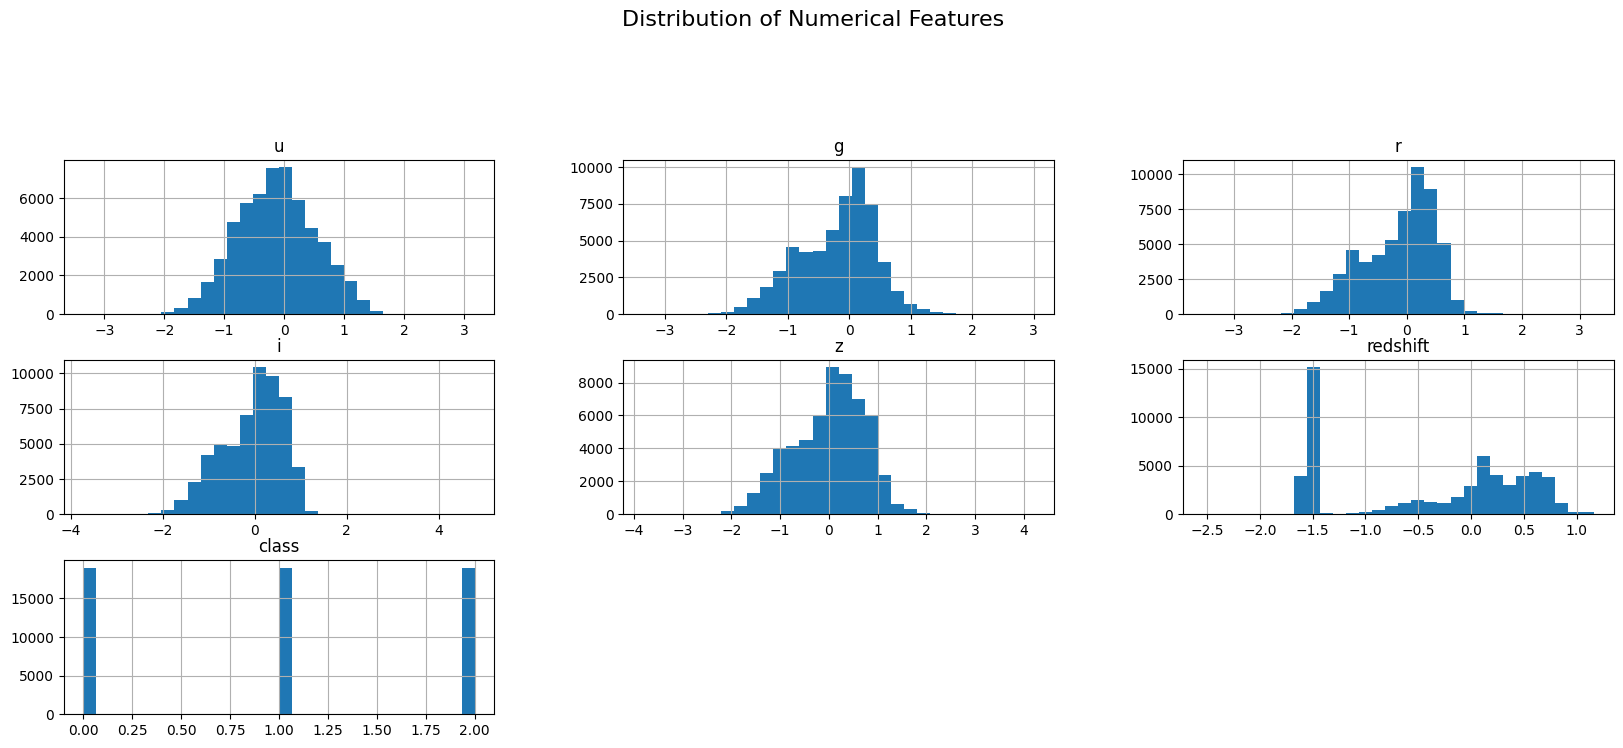

In [101]:
cleaned_resampled.hist(bins=30, figsize=(20, 15), layout=(6, 3))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

C:\Users\63945\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


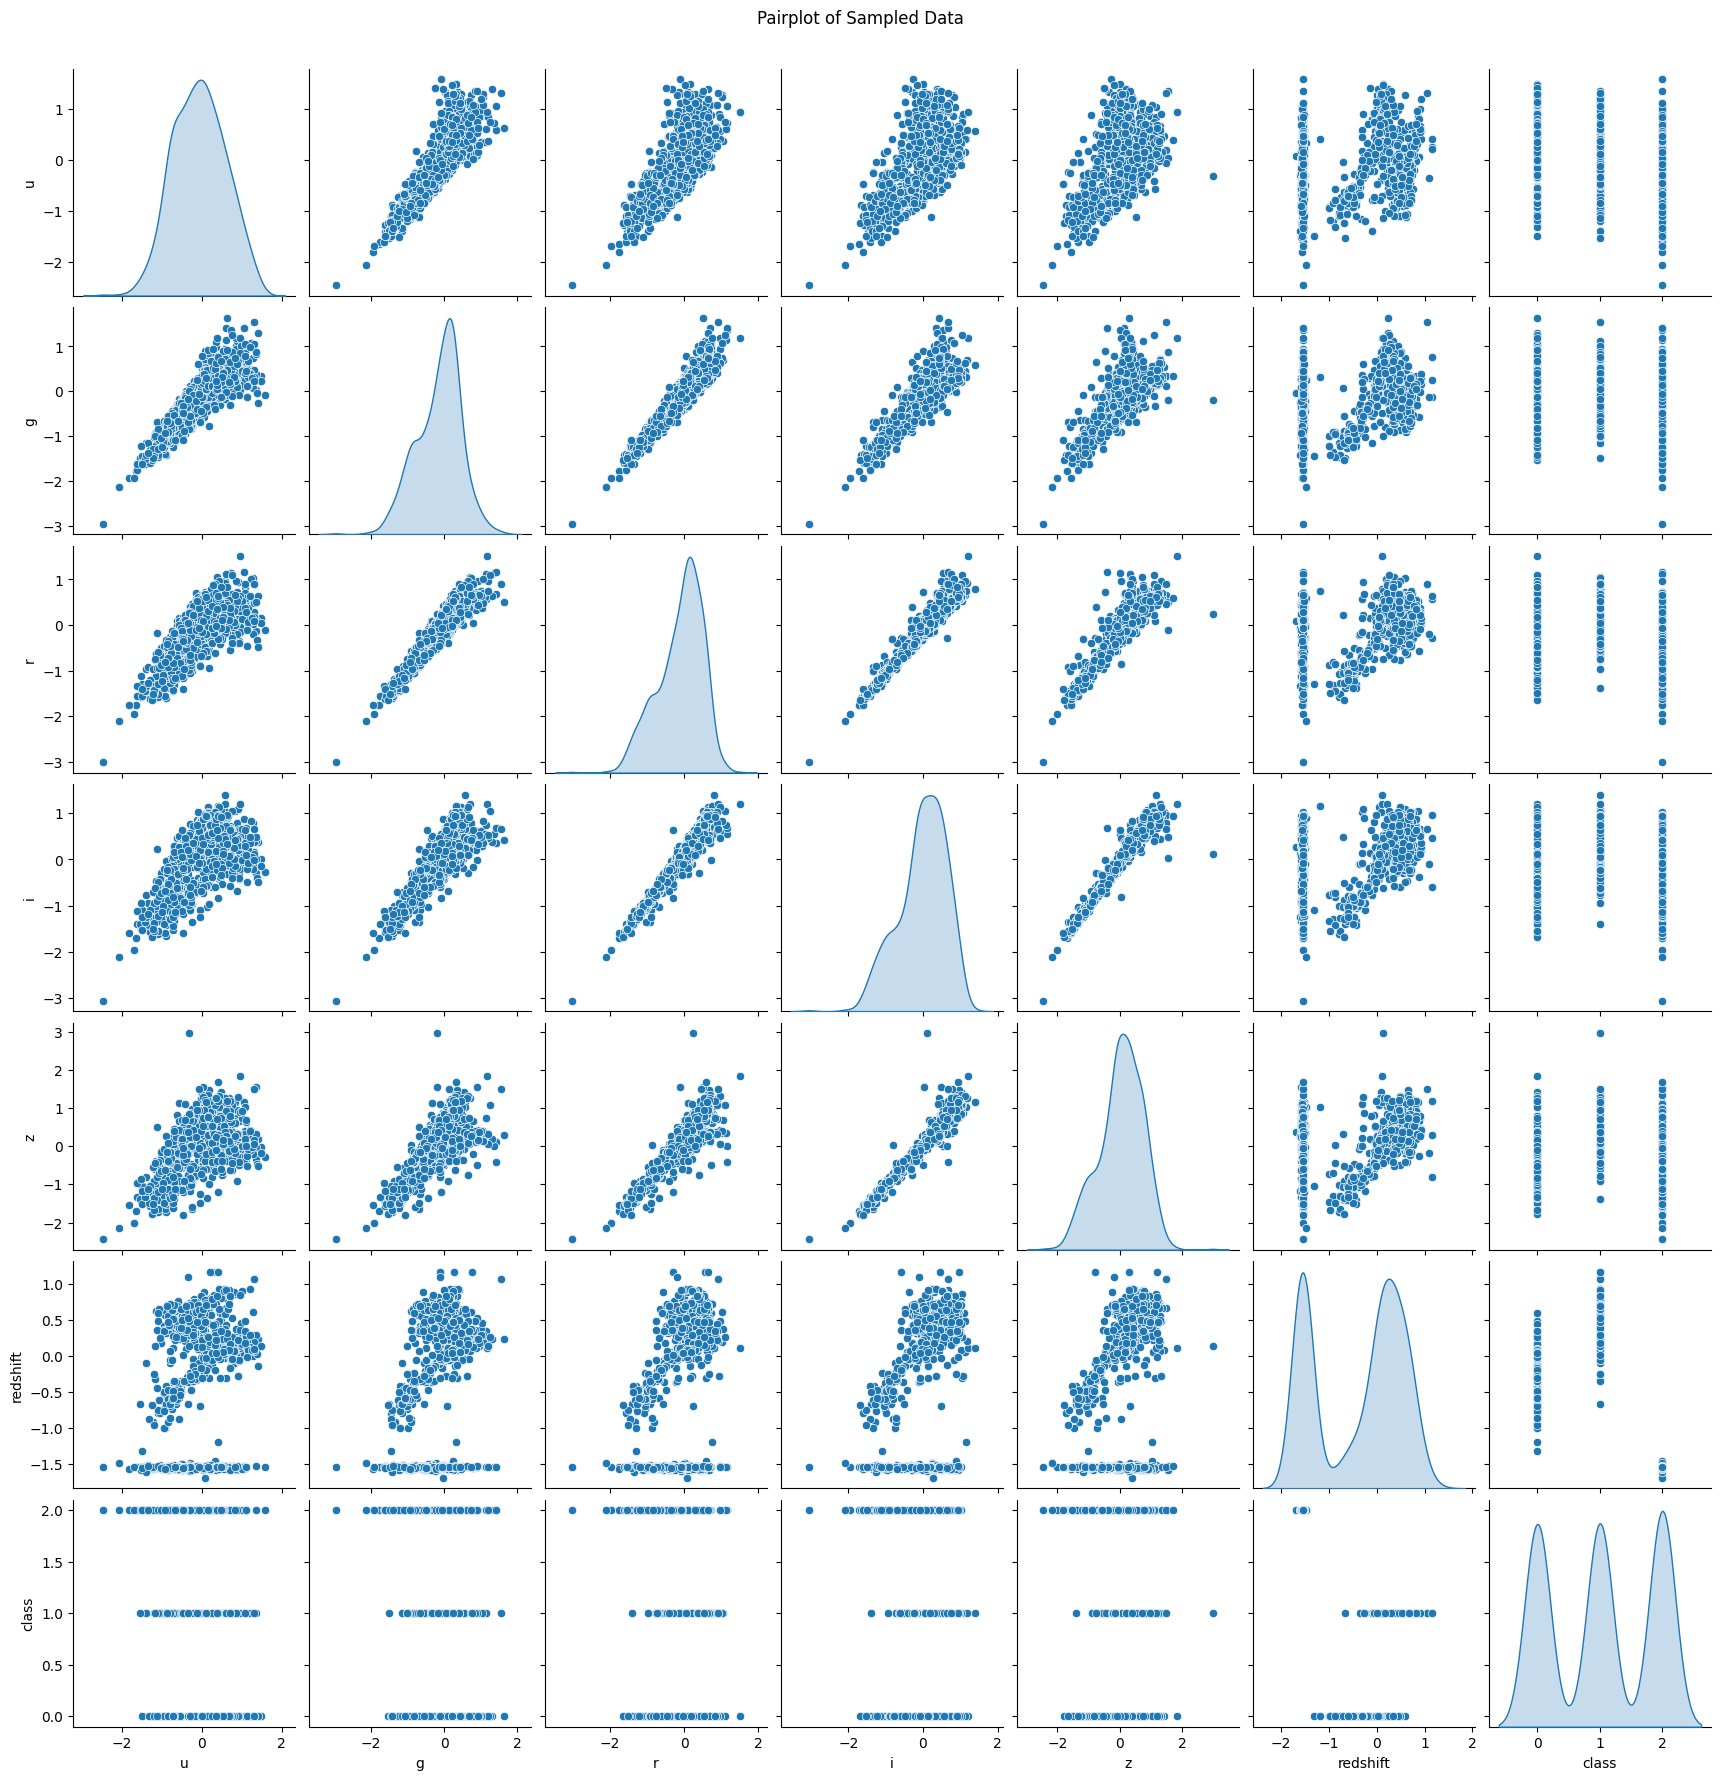

In [102]:
sns.pairplot(cleaned_resampled.sample(1000), diag_kind='kde')
plt.suptitle("Pairplot of Sampled Data", y=1.02)
plt.show()

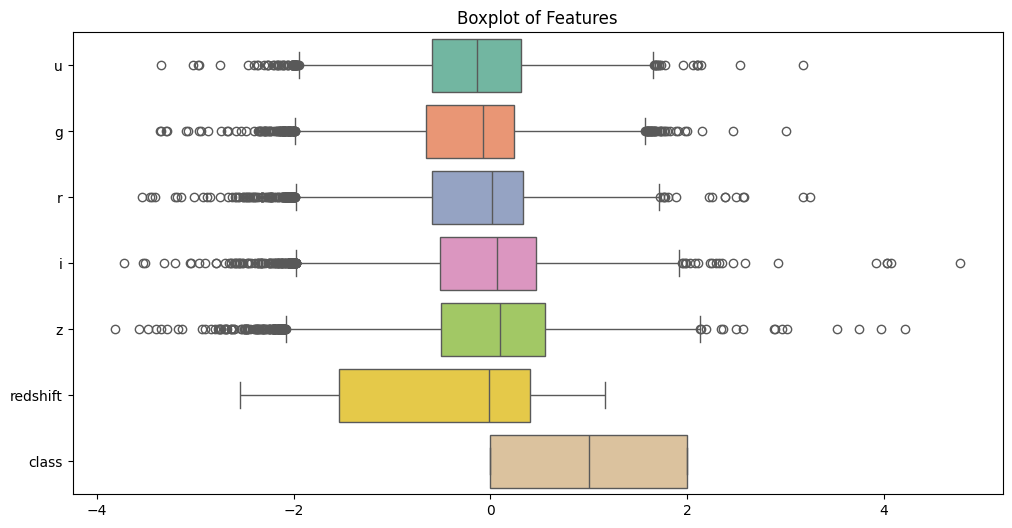

In [103]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_resampled, orient='h', palette='Set2')
plt.title("Boxplot of Features")
plt.show()

Correlation Analysis

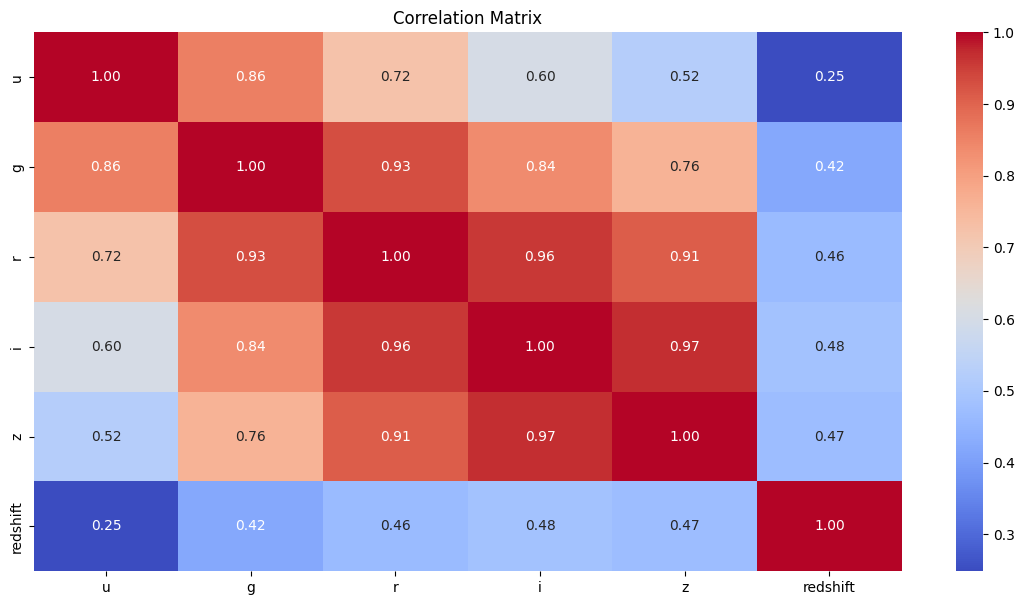

In [104]:
cleaned_resampled_numeric = cleaned_resampled.drop(columns=['class'])


plt.figure(figsize=(14, 7))
corr_matrix = cleaned_resampled_numeric.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

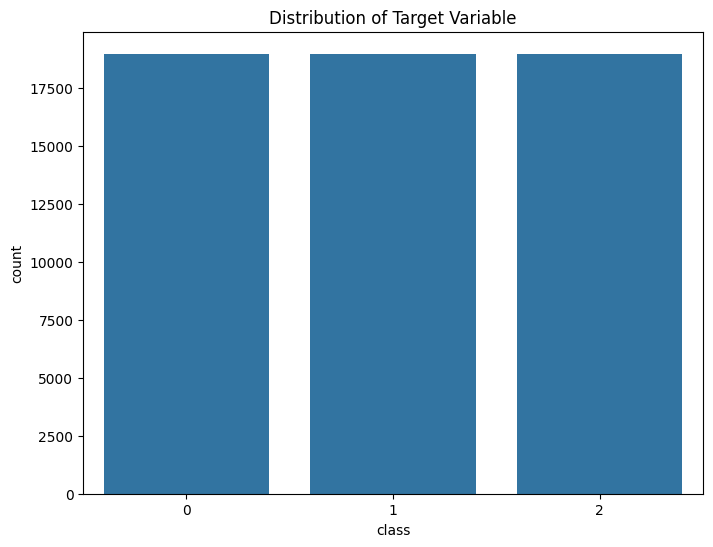

In [105]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=cleaned_resampled)
plt.title("Distribution of Target Variable")
plt.show()


In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='feature1', y='feature2', hue='target', data=cleaned_resampled)
plt.title("Feature1 vs Feature2 Colored by Target")
plt.show()

ValueError: Could not interpret value `feature1` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# #means_undersampledandnormalized = cleaned.groupby('class').mean()
# #means_undersampledandnormalized = means_undersampledandnormalized[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']].T
# #print("Means of Undersampled and Normalized Data:\n\n", means_undersampledandnormalized)




In [ ]:

# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Convert means_raw and means_undersampledandnormalized to DataFrames for easier plotting
# means_raw_df = means_raw.reset_index().rename(columns={'index': 'Feature'})
# means_undersampled_df = means_undersampledandnormalized.reset_index().rename(columns={'index': 'Feature'})

# # List of features to plot
# features = means_raw_df['Feature'].tolist()

# # Plot each feature one by one
# for feature in features:
#     plt.figure(figsize=(12, 6))
    
#     # Plot for raw data
#     plt.subplot(1, 2, 1)
#     sns.barplot(x='Class', y=feature, data=means_raw_df.melt(id_vars='Feature', var_name='Class', value_name=feature))
#     plt.title(f'Mean of {feature} for Raw Data')
#     plt.xlabel('Class')
#     plt.ylabel('Mean Value')
    
#     # Plot for undersampled and normalized data
#     plt.subplot(1, 2, 2)
#     sns.barplot(x='Class', y=feature, data=means_undersampled_df.melt(id_vars='Feature', var_name='Class', value_name=feature))
#     plt.title(f'Mean of {feature} for Undersampled and Normalized Data')
#     plt.xlabel('Class')
#     plt.ylabel('Mean Value')
    
#     plt.tight_layout()
#     plt.show()


In [ ]:
# median_raw = stars.groupby('class').median()
# median_raw = median_raw[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']].T
# print("Median of Raw Data:\n", median_raw)


# median_undersampledandnormalized = cleaned.groupby('class').median()
# median_undersampledandnormalized = median_undersampledandnormalized[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']].T
# print("Median of Undersampled and Normalized Data:\n", median_undersampledandnormalized)




In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Convert median_raw and median_undersampledandnormalized to DataFrames for easier plotting
# median_raw_df = median_raw.reset_index().rename(columns={'index': 'Feature'})
# median_undersampled_df = median_undersampledandnormalized.reset_index().rename(columns={'index': 'Feature'})

# # List of features to plot
# features = median_raw_df['Feature'].tolist()

# # Plot each feature one by one
# for feature in features:
#     plt.figure(figsize=(12, 6))
    
#     # Plot for raw data
#     plt.subplot(1, 2, 1)
#     sns.barplot(x='Class', y=feature, data=median_raw_df.melt(id_vars='Feature', var_name='Class', value_name=feature))
#     plt.title(f'Median of {feature} for Raw Data')
#     plt.xlabel('Class')
#     plt.ylabel('Median Value')
    
#     # Plot for undersampled and normalized data
#     plt.subplot(1, 2, 2)
#     sns.barplot(x='Class', y=feature, data=median_undersampled_df.melt(id_vars='Feature', var_name='Class', value_name=feature))
#     plt.title(f'Median of {feature} for Undersampled and Normalized Data')
#     plt.xlabel('Class')
#     plt.ylabel('Median Value')
    
#     plt.tight_layout()
#     plt.show()


In [ ]:
# # Plotting histograms for each feature
# for feature in features:
#     plt.figure(figsize=(12, 6))

#     # Histogram for undersampled and normalized data
#     plt.subplot(1, 2, 2)
#     for label in cleaned['class'].unique():
#         subset = cleaned[cleaned['class'] == label]
#         sns.histplot(subset[feature], label=label, kde=True, bins=30, stat="density", common_norm=False)
#     plt.title(f'Frequency Distribution of {feature} for Undersampled and Normalized Data')
#     plt.xlabel(feature)
#     plt.ylabel('Density')
#     plt.legend()

#     plt.tight_layout()
#     plt.show()


In [ ]:
# # Correlation heatmap for undersampled and normalized data
# plt.figure(figsize=(12, 8))
# sns.heatmap(cleaned[features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Heatmap for Undersampled and Normalized Data')
# plt.show()


In [ ]:
# import pandas as pd
# import scipy.stats as stats

# # Define the columns to check for outliers
# cols = ['u', 'g', 'r', 'i', 'z', 'redshift']

# # Create a DataFrame to store the outlier information
# outliers_df = pd.DataFrame()

# # Calculate and print the number of outliers for each feature
# for feature in cols:
#     z_scores = stats.zscore(cleaned[feature])
#     outliers = (abs(z_scores) >= 3)
#     outliers_df[feature] = outliers
#     print(f'"{feature}" outliers: {outliers.sum()}')

# print("\n")

# # Calculate and print the outlier percentage for each feature
# for feature in cols:
#     outlier_percentage = 100 * outliers_df[feature].sum() / len(cleaned)
#     print(f'"{feature}" outlier percentage: {outlier_percentage:.2f} %')

